# Machine learning and statistical learning
## Support Vector Machines
Author Jean-Baptiste GOMEZ
## 1 Context
In this exercise, you will generate a binary response variable, and then train some SVM on that
data. You will vary the values of the parameters in the estimations and look at the effect of the
predicted classes.

## 2 Generate some data

1. Generate 200 points from the unit square:
- for example, draw the x1 coordinates from a U[0, 1] distribution and the x2 coordinates from a U[0, 1] .

In [90]:
import numpy as np
import seaborn as sns
%matplotlib inline  
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

[(0.9476322568516703, 0.25008962303918325), (0.226547421131723, 0.7991798624278716), (0.5944201443911326, 0.4048547808806915), (0.42830868492969476, 0.056278840080299486), (0.76414068655387, 0.2957176866995683)]


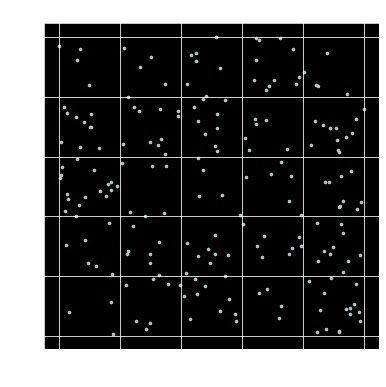

In [91]:
# Set the random seed for reproducibility (optional)
np.random.seed(200)

# Number of points to generate
num_points = 200

# Generate random x1 and x2 coordinates from a uniform distribution U[0, 1]
x1_coordinates = np.random.uniform(0, 1, num_points)
x2_coordinates = np.random.uniform(0, 1, num_points)

# Combine x1 and x2 coordinates into a list of points
points = list(zip(x1_coordinates, x2_coordinates))
print(points[:5])

# Create a scatter plot
plt.figure(figsize=(6, 6))
sns.scatterplot(x=x1_coordinates, y=x2_coordinates, s=10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter Plot of Random Points in the Unit Square')
plt.grid(True)
plt.show()


2. Assign the label “blue” and “orange” to each of the 200 observations according to the following rule:
 - if **2×x1 +0.25−x2 > 0** and **−2×x1 +2−x2 > 0**, then the label should be *“orange”*
 - otherwise, the label should be *“blue”*.

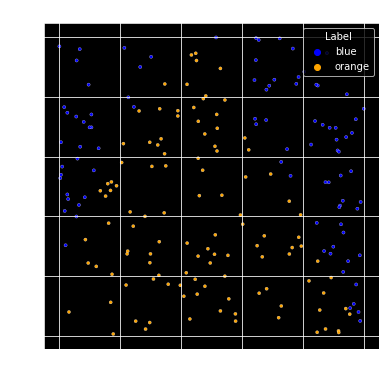

In [92]:
# Assign labels based on the given rule
labels = []
for x1, x2 in zip(x1_coordinates, x2_coordinates):
    if 2 * x1 + 0.25 - x2 > 0 and -2 * x1 + 2 - x2 > 0:
        labels.append("orange")
    else:
        labels.append("blue")

# Create a dataframe with x1, x2, and labels
data = {"x1": x1_coordinates, "x2": x2_coordinates, "Label": labels}

# Create a scatter plot using Seaborn with different colors for "blue" and "orange"
plt.figure(figsize=(6, 6))
sns.scatterplot(x="x1", y="x2", hue="Label", data=data, s=10, palette={"blue": "blue", "orange": "orange"})
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter Plot with Assigned Labels ("blue" and "orange")')
plt.grid(True)
plt.show()

3. Now, add a noise to each point. The noise should be randomly drawn from a U[−.1, .1] (this way, the 200 generated points should not be perfectly separable).

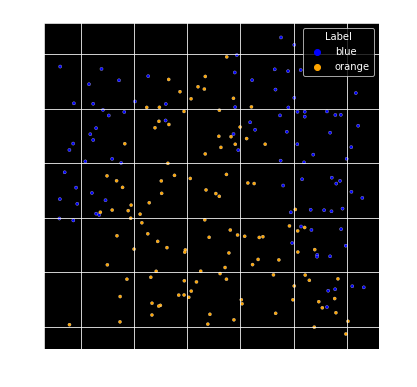

In [93]:
# Generate random noise values from a uniform distribution U[-0.1, 0.1]
noise_x1 = np.random.uniform(-0.1, 0.1, num_points)
noise_x2 = np.random.uniform(-0.1, 0.1, num_points)

# Add noise to x1 and x2 coordinates
x1_coordinates += noise_x1
x2_coordinates += noise_x2

# Create a dataframe with x1, x2, and labels
data = {"x1": x1_coordinates, "x2": x2_coordinates, "Label": labels}

# Create a scatter plot using Seaborn with different colors for "blue" and "orange"
plt.figure(figsize=(6, 6))
sns.scatterplot(x="x1", y="x2", hue="Label", data=data, s=10, palette={"blue": "blue", "orange": "orange"})
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter Plot with Assigned Labels ("blue" and "orange") and Noise')
plt.grid(True)
plt.show()


4. Graph your points on a scatter plot, where the color of each point should reflect its label. Add the true boundaries. The equations of the separating lines are : **x2 = 2x1 +0.25 and x2 = −2x + 2**.

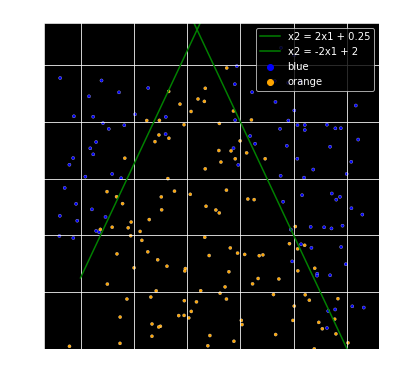

In [106]:
# Create a scatter plot using Seaborn with different colors for "blue" and "orange"
plt.figure(figsize=(6, 6))
sns.scatterplot(x="x1", y="x2", hue="Label", data=data, s=10, palette={"blue": "blue", "orange": "orange"})
# Plot the true boundaries
x_values = np.linspace(0, 1, 100)
plt.plot(x_values, 2 * x_values + 0.25, label='x2 = 2x1 + 0.25', color='green')
plt.plot(x_values, -2 * x_values + 2, label='x2 = -2x1 + 2', color='green')
# plt.xlabel('x1')
# plt.ylabel('x2')
plt.ylim(0,1.15)
plt.title('Scatter Plot with Assigned Labels ("blue" and "orange") and Noise')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

## 3 Training the SVM algorithm

1. Using either R or Python, train a SVM classifier on your 200 points, picking a linear kernel. Then, visualize the resulting boundaries. What can you see?

In [108]:
# Create a feature matrix X
X = np.column_stack((x1_coordinates, x2_coordinates))

# Assign numerical labels based on the given rule
labels = []
for x1, x2 in zip(x1_coordinates, x2_coordinates):
    if 2 * x1 + 0.25 - x2 > 0 and -2 * x1 + 2 - x2 > 0:
        labels.append(1)  # Classify as 1
    else:
        labels.append(0)  # Classify as 0

# Create an SVM classifier with a linear kernel
clf = svm.SVC(kernel='linear')
# Fit the classifier to the data
clf.fit(X, labels)


SVC(kernel='linear')

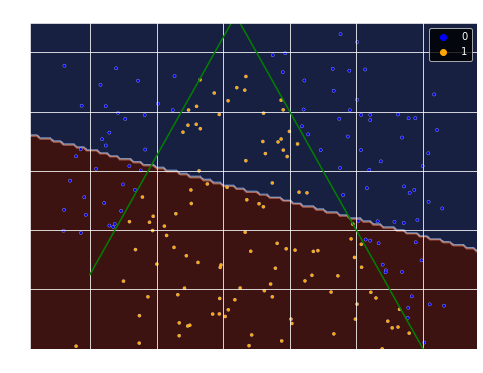

In [114]:

# Create a mesh grid for plotting the decision boundaries
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualize the decision boundaries
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
#plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=plt.cm.coolwarm, s=10)
sns.scatterplot(x=x1_coordinates, y=x2_coordinates, hue=labels, palette={0: "blue", 1: "orange"}, s=10)

x_values = np.linspace(0, 1, 100)
plt.plot(x_values, 2 * x_values + 0.25, label='x2 = 2x1 + 0.25', color='green')
plt.plot(x_values, -2 * x_values + 2, label='x2 = -2x1 + 2', color='green')
plt.ylim(0,1.1)
# plt.xlabel('x1')
# plt.ylabel('x2')
plt.title('SVM Classifier with Linear Kernel and Decision Boundaries')
plt.grid(True)
plt.show()

2. Now, fit a SVM classifier using a polynomial kernel. According to the true form of your boundary, what value of the degree should you pick?


Degree 1 Accuracy: 0.685
Degree 2 Accuracy: 0.755
Degree 3 Accuracy: 0.85
Degree 4 Accuracy: 0.845
Degree 5 Accuracy: 0.885
Best Degree: 5 (Highest Accuracy: 0.885)


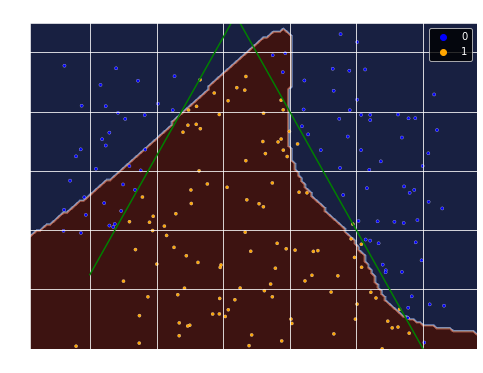

In [115]:
# Experiment with different polynomial degrees
degrees = [1, 2, 3, 4, 5]  # Try different degrees
best_degree = None
best_accuracy = 0.0

for degree in degrees:
    # Create an SVM classifier with a polynomial kernel of the current degree
    clf = svm.SVC(kernel='poly', degree=degree)

    # Fit the classifier to the data
    clf.fit(X, labels)

    # Calculate the accuracy of the classifier (you can use cross-validation for a more robust estimate)
    accuracy = clf.score(X, labels)

    # Print the accuracy for the current degree
    print(f'Degree {degree} Accuracy: {accuracy}')

    # Update the best degree if the accuracy is higher
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_degree = degree

# Print the best degree found
print(f'Best Degree: {best_degree} (Highest Accuracy: {best_accuracy})')

# Fit the SVM classifier with the best degree
best_clf = svm.SVC(kernel='poly', degree=best_degree)
best_clf.fit(X, labels)

# Create a mesh grid for plotting the decision boundaries
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = best_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualize the decision boundaries
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
sns.scatterplot(x=x1_coordinates, y=x2_coordinates, hue=labels, palette={0: "blue", 1: "orange"}, s=10)

x_values = np.linspace(0, 1, 100)
plt.plot(x_values, 2 * x_values + 0.25, label='x2 = 2x1 + 0.25', color='green')
plt.plot(x_values, -2 * x_values + 2, label='x2 = -2x1 + 2', color='green')
plt.ylim(0,1.1)
# plt.xlabel('x1')
# plt.ylabel('x2')
plt.title('SVM Classifier with Linear Kernel and Decision Boundaries')
plt.grid(True)
plt.show()

3. Using your trained classifier, predict the values on a grid ranging from −.1 to 1.1 for each dimension (for x1 and for x2).

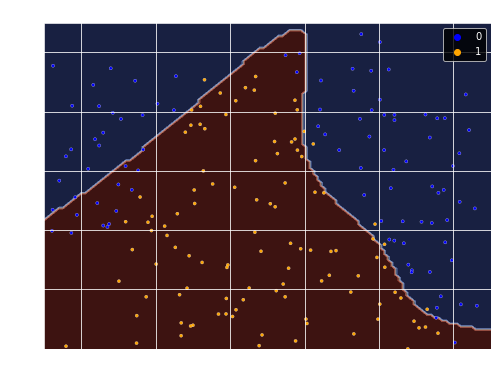

In [117]:

# Create an SVM classifier with a polynomial kernel (best degree determined earlier)
best_degree = 5 
clf = svm.SVC(kernel='poly', degree=best_degree)

# Fit the classifier to the data
clf.fit(X, labels)

# Create a mesh grid for prediction
x1_min, x1_max = -0.1, 1.1
x2_min, x2_max = -0.1, 1.1
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predict the labels for each point on the grid
grid_predictions = clf.predict(grid_points)

# Reshape the predictions to match the shape of the mesh grid
grid_predictions = grid_predictions.reshape(xx.shape)

# Visualize the predicted regions
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, grid_predictions, cmap=plt.cm.coolwarm, alpha=0.3)
sns.scatterplot(x=x1_coordinates, y=x2_coordinates, hue=labels, palette={0: "blue", 1: "orange"}, s=10)

#x_values = np.linspace(0, 1, 100)
# plt.plot(x_values, 2 * x_values + 0.25, label='x2 = 2x1 + 0.25', color='green')
# plt.plot(x_values, -2 * x_values + 2, label='x2 = -2x1 + 2', color='green')
plt.ylim(0,1.1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('SVM Classifier with Linear Kernel and Decision Boundaries')
plt.grid(True)
plt.show()

4. Plot the dots of your grid on a scatter plot, and add the true boundaries.

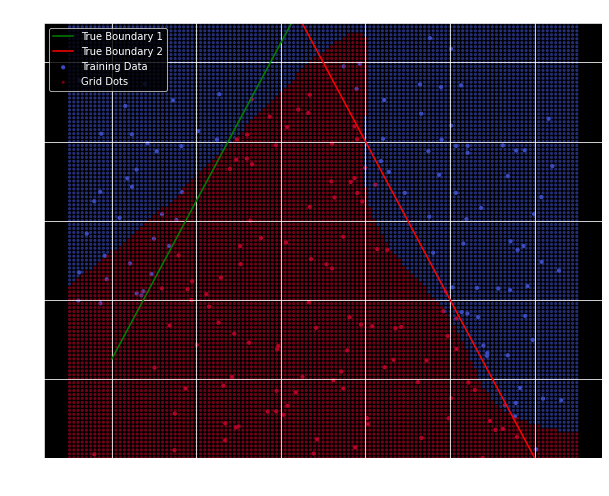

In [120]:
# Visualize the predicted regions
plt.figure(figsize=(10, 8))
plt.ylim(0,1.1)
# Create a scatter plot with different colors for labels (training data)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=plt.cm.coolwarm, s=10, label="Training Data")

# Plot the true boundaries
x_values = np.linspace(0, 1, 100)
plt.plot(x_values, 2 * x_values + 0.25, label='True Boundary 1', color='green')
plt.plot(x_values, -2 * x_values + 2, label='True Boundary 2', color='red')

# Plot the dots of the grid on the scatter plot
plt.scatter(grid_points[:, 0], grid_points[:, 1], c=grid_predictions.ravel(), cmap=plt.cm.coolwarm, s=5, alpha=0.5, label="Grid Dots")

plt.xlabel('x1')
plt.ylabel('x2')
plt.title(f'SVM Classifier with Polynomial Kernel (Degree {best_degree}) and Predicted Regions')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

5. Try different values for the cost parameter. For each cost parameter that you set, predict the values at each point of your grid and plot the points matching the color to the predicted class.

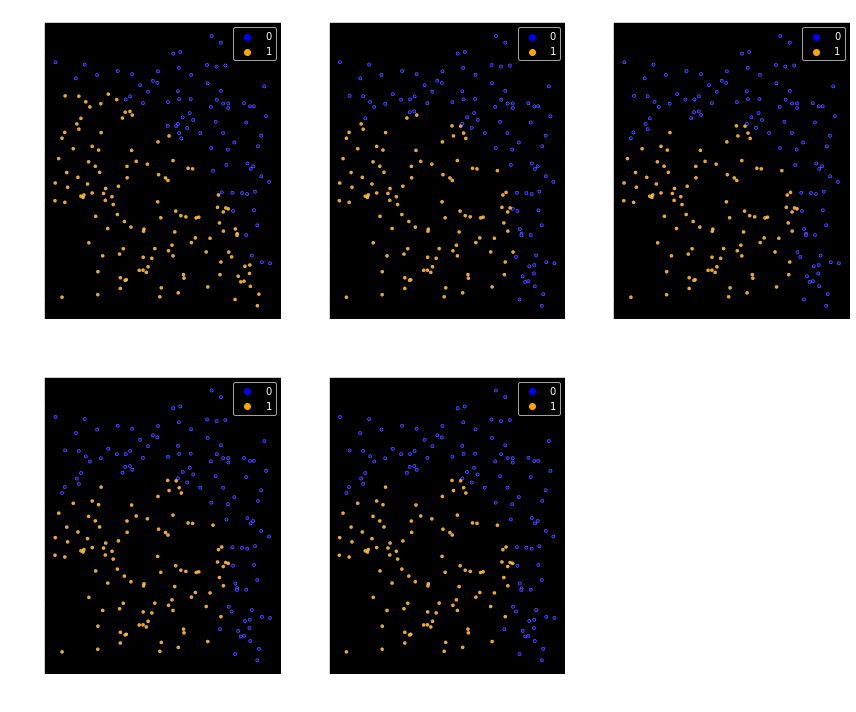

In [121]:

# Try different values for the cost parameter (C)
C_values = [0.01, 0.1, 1, 10, 100]  # Adjust as needed
plt.figure(figsize=(12, 10))

for i, C in enumerate(C_values):
    # Create an SVM classifier with a polynomial kernel (best degree determined earlier) and the current C value
    best_degree = 2  # Change this to the degree you found to be the best
    clf = svm.SVC(kernel='poly', degree=best_degree, C=C)

    # Fit the classifier to the data
    clf.fit(X, labels)

    # Predict the labels for the data points
    predicted_labels = clf.predict(X)

    # Create a scatter plot using Seaborn with different colors for labels (predicted labels)
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=x1_coordinates, y=x2_coordinates, hue=predicted_labels, palette={0: "blue", 1: "orange"}, s=10)
    plt.title(f'SVM Classifier (C = {C})')
    plt.xlabel('x1')
    plt.ylabel('x2')

plt.tight_layout()
plt.show()

6. Assume that you do not know the true boundary. If you are to fit a SVM using a polynomial kernel, how would you do to pick a value for the cost parameter and for the degree? Explain you methodology in details.

Choosing the appropriate values for the cost parameter (C) and the degree of the polynomial kernel when you don't know the true boundary is a crucial step in training an SVM classifier. This process often involves experimentation and validation to find the best hyperparameters. Here's a step-by-step methodology to help you make informed choices:

1. **Split the Data:** Start by splitting your dataset into training and validation sets. A common split is 70% for training and 30% for validation, but you can adjust this ratio depending on your dataset size and characteristics.

2. **Define a Range of Hyperparameters:** Determine a range of values to explore for both C and the polynomial degree. For example, you can create lists or arrays of candidate values. For C, you might try values like [0.01, 0.1, 1, 10, 100], and for the degree, you can experiment with [1, 2, 3, 4, 5].

3. **Grid Search or Random Search:** You can perform a grid search or a random search over the hyperparameters. Both approaches have their merits:

   - **Grid Search:** This involves exhaustively trying all possible combinations of hyperparameters. It's a systematic approach and guarantees finding the best combination within the specified range. However, it can be computationally expensive, especially for large search spaces.

   - **Random Search:** In this approach, you randomly sample hyperparameters from the specified ranges. It's more efficient than grid search in terms of computational resources and often finds good hyperparameters relatively quickly. You can control the number of random samples.

4. **Model Training and Evaluation:** For each combination of hyperparameters, train an SVM classifier on the training data and evaluate its performance on the validation data. Common performance metrics for classification tasks include accuracy, precision, recall, F1-score, and ROC-AUC.

5. **Cross-Validation:** To obtain more reliable estimates of model performance, consider using k-fold cross-validation. This involves splitting the training data into k subsets (folds), training the model on k-1 folds, and validating on the remaining fold. Repeat this process k times, rotating the validation fold each time. This helps reduce the impact of data variability and provides more robust performance metrics.

6. **Select the Best Hyperparameters:** Based on the validation performance metrics, choose the hyperparameters that yield the best results. You can use metrics like accuracy, F1-score, or ROC-AUC to make this decision, depending on the problem's objectives.

7. **Evaluate on Test Data:** After selecting the best hyperparameters, evaluate the final model on a separate test dataset that was not used during hyperparameter tuning. This provides an unbiased estimate of how well your model will perform on unseen data.

8. **Iterate if Necessary:** If the model's performance on the test data is not satisfactory, you can iterate through the process by adjusting the hyperparameters or exploring other types of kernels (e.g., radial basis function kernel) to see if they lead to better results.

9. **Regularization:** Keep in mind that the choice of the cost parameter C influences the trade-off between maximizing the margin (lower C) and minimizing training errors (higher C). Smaller C values promote simpler models, while larger C values allow the model to fit the training data more closely. Regularization techniques like cross-validation can help you strike the right balance.

10. **Visualize Decision Boundaries (Optional):** If appropriate, you can visualize the decision boundaries of the final model with the selected hyperparameters to gain insights into its behavior.

By following this methodology, you can systematically explore different hyperparameters for your SVM classifier and choose the combination that yields the best performance on your validation or test data, even when you don't know the true boundary. This approach helps you strike the right balance between model complexity and generalization to unseen data.